In [12]:
from hdimvis.metrics.stress.stress import vectorised_stress,unvectorised_stress
from hdimvis.data_fetchers.DataFetcher import DataFetcher
from hdimvis.metrics.distance_measures.euclidian_and_manhattan import euclidean,manhattan
import numpy as np
import tracemalloc
from time import perf_counter
import definitions
import os
import matplotlib.pylab as plt

In [2]:
large_dataset = DataFetcher.fetch_data('mnist', size='max')


####################
Fetching the "mnist" dataset


C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


####################
Dataset loaded
Dataset shape: (70000, 784)


In [ ]:
sizes = np.arange(10,2000, 50)
print(sizes)
sizes = [3000]


vectorised_data = np.zeros((len(sizes),3)) # 3 for memory use base (index 0), memory use peak (1) and time (index 2)
un_vectorised_data = np.zeros((len(sizes),3))

collected_data = [vectorised_data, un_vectorised_data]
functions = [vectorised_stress, unvectorised_stress]

In [ ]:
for i, size in enumerate(sizes):
    for j in range(2):
        print(size)
        sample_indices = np.random.randint(0, 69999, size)
        sample = large_dataset.data[sample_indices]
        ld_positions = 20*np.random.rand(sample.shape[0],2)
        stress_fn = functions[j]

        tracemalloc.start()
        stress1 = stress_fn(sample, ld_positions, euclidean)
        collected_data[j][i,0] = tracemalloc.get_traced_memory()[0]
        collected_data[j][i,1] = tracemalloc.get_traced_memory()[1]
        tracemalloc.stop()



        start = perf_counter()
        stress2 = stress_fn(sample, ld_positions, euclidean)
        collected_data[j][i,2] = perf_counter() - start









2000


In [10]:
output_dir = os.path.realpath(os.path.join(definitions.PROJECT_ROOT, "experiments/stress_vectorisation/out/stress_vec_1.npy"))

with open(output_dir, 'wb') as f:
    np.save(f, vectorised_data)
    np.save(f, un_vectorised_data)

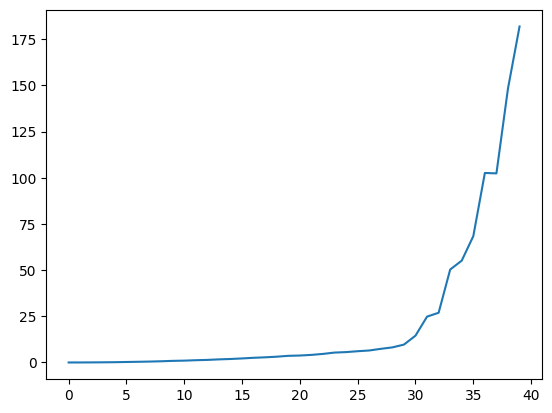

In [27]:
fig, ax = plt.subplots()

x = np.arange(un_vectorised_data.shape[0])
y = vectorised_data[:,2]

ax.plot(x, y)
plt.show()

In [7]:
with open(output_dir, 'rb') as f:
    a = np.load(f)
    b= np.load(f)
print(a)
print(b)

[[1.32504000e+06 1.96900000e-04]
 [1.58564800e+06 5.86900002e-04]
 [1.87434400e+06 7.36700000e-04]
 [2.18814400e+06 6.43200001e-04]
 [2.52704800e+06 8.49500000e-04]]
[[2.69667e+05 3.31880e-03]
 [2.93928e+05 3.67800e-03]
 [3.19088e+05 4.16220e-03]
 [3.44304e+05 5.07510e-03]
 [3.69520e+05 5.75470e-03]]


[[1.32205600e+06 4.06300000e-04]
 [3.14468560e+07 8.99520000e-03]
 [1.25600632e+08 3.71306000e-02]]
